In [1]:
# import nessessary modules
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Creating a GeoDataFrame from coordinate data
data = {
    'City': ['New York', 'Los Angeles', 'Chicago'],
    'Latitude': [40.7128, 34.0522, 41.8781],
    'Longitude': [-74.0060, -118.2437, -87.6298]
}

In [3]:
# First create a regular DataFrame
df = pd.DataFrame(data)

In [4]:
# Convert to GeoDataFrame by creating Point geometries from conordinates
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.Longitude, df.Latitude),
    crs="EPSG:4326"  # WGS84 Latitude/Longitude
)

gdf.head()

,City,Latitude,Longitude,geometry
0,New York,40.7128,-74.0060,POINT (-74.006 40.7128)
1,Los Angeles,34.0522,-118.2437,POINT (-118.2437 34.0522)
2,Chicago,41.8781,-87.6298,POINT (-87.6298 41.8781)


In [12]:
# Reading a GeoJSON file
url = "https://github.com/opengeos/datasets/releases/download/vector/nybb.geojson"
gdf = gpd.read_file(url)
gdf.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [13]:
output_file = "nyc_boroughs.geojson"
gdf.to_file(output_file, driver="GeoJSON")
print(f"GeoJSON file saved to {output_file}")

GeoJSON file saved to nyc_boroughs.geojson


In [14]:
# save as shapefile (tranitioned GIS format)
output_file = "nyc_boroughs.shp"
gdf.to_file(output_file, driver="ESRI Shapefile")
print(f"Shapefile saved to {output_file}")

Shapefile saved to nyc_boroughs.shp


c:\Users\thammarat\miniconda3\envs\geo_new\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 1623819823.80999994 of field Shape_Area of feature 0 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
c:\Users\thammarat\miniconda3\envs\geo_new\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 3045212795.19999981 of field Shape_Area of feature 1 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
c:\Users\thammarat\miniconda3\envs\geo_new\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 1937478507.6099999 of field Shape_Area of feature 2 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
c:\Users\thammarat\miniconda3\envs\geo_new\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 636471539.774000049 of field Shape_Area of feature 3 not successfully written. Possibly due to too larger number with respect t

In [15]:
# Save as GeoPackage (modern GIS format)
output_file = "nyc_boroughs.gpkg"
gdf.to_file(output_file, driver="GPKG")
print(f"GeoPackage saved to {output_file}")

GeoPackage saved to nyc_boroughs.gpkg


In [16]:
# Check the coordinate reference system (CRS)
print(f"Current CRS: {gdf.crs}")

Current CRS: EPSG:2263


In [17]:
# Reproject to WGS84 (lat/lon) for global compatibility
gdf_4326 = gdf.to_crs(epsg=4326)
print(f"Reprojected CRS: {gdf_4326.crs}")
gdf_4326.head()

Reprojected CRS: EPSG:4326


,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


In [18]:
# Reproject to Web Mercator (EPSG:3857) for accurate area calculations in square meters
gdf = gdf.to_crs(epsg=3857)

# Set BoroName as index for easier data access
gdf = gdf.set_index('BoroName')
print(f"Now using CRS: {gdf.crs}")

Now using CRS: EPSG:3857


In [19]:
# Calculate area in square meters
gdf["area_sqm"] = gdf.geometry.area

# convert area to square kilometers
gdf["area_sqkm"] = gdf["area_sqm"] / 1_000_000

# Display results sorted by area
print(gdf[["area_sqm", "area_sqkm"]].sort_values(by="area_sqkm", ascending=False))

                   area_sqm   area_sqkm
BoroName                               
Queens         4.928309e+08  492.830862
Brooklyn       3.129685e+08  312.968462
Staten Island  2.618039e+08  261.803915
Bronx          1.929251e+08  192.925086
Manhattan      1.032200e+08  103.219998


In [20]:
# Extract boundary lines from polygons
gdf['boundary'] = gdf.boundary

# Calculate centroids of the boroughs
gdf['centroid'] = gdf.centroid

# Display the boundaries and centroids
gdf[['boundary', 'centroid']].head()

,boundary,centroid
BoroName,,
Staten Island,"MULTILINESTRING ((-8243264.876 4948597.81, -82...",POINT (-8254713.579 4950718.031)
Queens,"MULTILINESTRING ((-8219461.955 4952778.645, -8...",POINT (-8217436.763 4969318.625)
Brooklyn,"MULTILINESTRING ((-8222843.701 4950893.717, -8...",POINT (-8231817.474 4960085.206)
Manhattan,"MULTILINESTRING ((-8238858.85 4965914.966, -82...",POINT (-8233984.779 4979551.698)
Bronx,"MULTILINESTRING ((-8226155.123 4982269.863, -8...",POINT (-8222783.627 4990631.165)


In [21]:
# Use Manhattan's centroid as the reference point
manhattan_centroid = gdf.loc['Manhattan', 'centroid']

# Calculate distance from each borough to Manhattan's centroid
gdf['distance_to_manhattan_m'] = gdf['centroid'].distance(manhattan_centroid)

# Convert to kilometers and display results
gdf['distance_to_manhattan_km'] = gdf['distance_to_manhattan_m'] / 1_000
gdf[['distance_to_manhattan_km']].sort_values(by='distance_to_manhattan_km')

,distance_to_manhattan_km
BoroName,
Manhattan,0.000000
Bronx,15.755012
Queens,19.456428
Brooklyn,19.586769
Staten Island,35.511456


In [24]:
# Calculate summary statistics
mean_distance = gdf['distance_to_manhattan_km'].mean()
max_distance = gdf['distance_to_manhattan_km'].max()
total_area = gdf['area_sqkm'].sum()

print(f"Mean distance to Manhattan: {mean_distance:.2f} km")
print(f"Max distance to Manhattan: {max_distance:.2f} km")
print(f"Total area of all boroughs: {total_area:.2f} sqkm")

Mean distance to Manhattan: 18.06 km
Max distance to Manhattan: 35.51 km
Total area of all boroughs: 1363.75 sqkm


In [25]:
# Visualize the boroughs with area-based coloring
import matplotlib.pyplot as plt

# Set high resolution for better quality
plt.rcParams['figure.dpi'] = 150

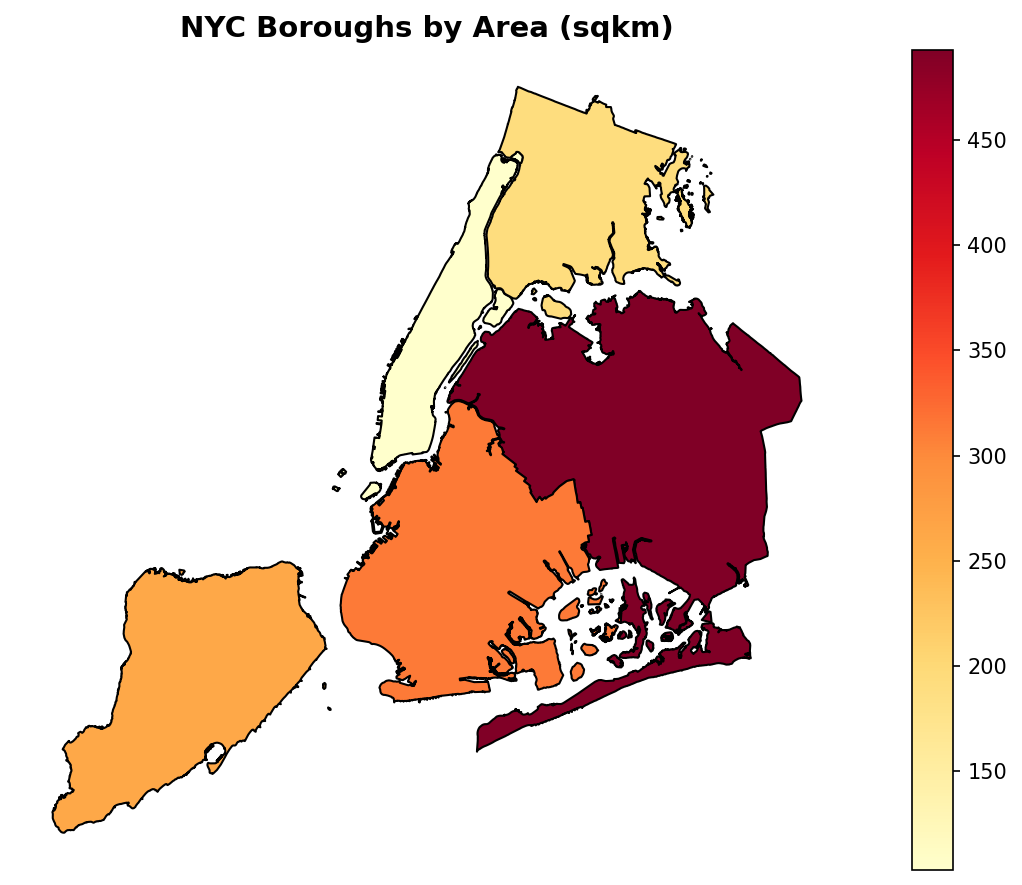

In [26]:
# Create a choropleth map showing boroughs colored by area
fig, ax = plt.subplots(figsize=(10,6))

gdf.plot(
    column='area_sqkm',
    cmap='YlOrRd',
    legend=True,
    edgecolor='black',
    ax=ax
)

plt.title("NYC Boroughs by Area (sqkm)", fontsize=14,fontweight='bold')
plt.axis('off') # remove axis for cleaner look
plt.tight_layout()
plt.show()


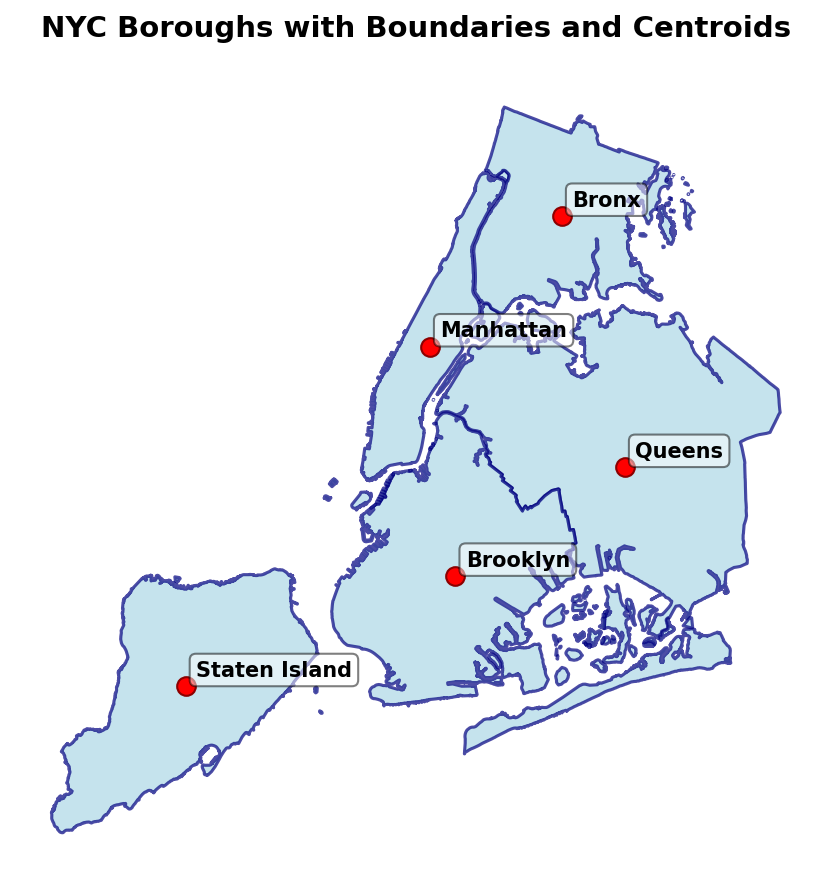

In [34]:
# Multi-Layer Visualization

# Create a comprehensive map with multiple layers
fig, ax = plt.subplots(figsize=(10,6))

# Plot borough boundaries as base layer
gdf["geometry"].plot(
    ax=ax,
    color="lightblue",
    edgecolor="navy",
    linewidth=1.5,
    alpha=0.7
)

# Add centroids as point layer
gdf["centroid"].plot(
    ax=ax,
    color="red",
    markersize=80,
    edgecolor="darkred",
    linewidth=1,
)

# Add borough labels
for idx, row in gdf.iterrows():
    # Get centroid coordinates for label placement
    x = row.centroid.x
    y = row.centroid.y
    ax.annotate(
        idx,
        (x, y),
        xytext=(5,5),
        textcoords="offset points",
        fontsize=10,
        fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.5),
    )

plt.title("NYC Boroughs with Boundaries and Centroids", fontsize=14,fontweight='bold')
plt.axis('off') # remove axis for cleaner look
plt.tight_layout()
plt.show()

In [41]:
# Create an interactive map using Folium integration
m = gdf.explore(
    column='area_sqkm',
    cmap='YlOrRd',
    legend=True,
    tooltip=['area_sqkm', 'distance_to_manhattan_km'],
    popup=True,
)

# D# บันทึกเป็น HTML แล้วเปิดในเบราว์เซอร์
m.save('nyc_map.html')
print("Saved to nyc_map.html - open it in your browser")

Saved to nyc_map.html - open it in your browser
